In [64]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [63]:
img=cv2.imread('../tmp/out/000.jpg')
#img=img[5:-5,5:-5]

In [72]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [76]:
gray.shape,np.sum(gray,axis=0).shape

((885, 106), (106,))

In [79]:
np.where(np.sum(~gray,axis=0)<=1000)

(array([ 27,  28,  29,  30,  31,  32,  33,  34,  64,  65,  66,  67,  68,
         69,  70,  71,  99, 100, 101, 102, 103, 104, 105]),)

In [80]:
np.sum(~gray,axis=0)

array([ 1450,  5725, 11371, 16940, 31695, 51803, 56702, 40642, 28360,
       28925, 33853, 34822, 46324, 61661, 49678, 36468, 33710, 32496,
       37072, 35505, 41121, 50886, 44988, 29799, 21818, 11646,  2653,
         681,   529,   574,   482,   514,   502,   604,   855,  1006,
        1559,  5392, 14516, 30230, 34365, 31606, 37852, 39400, 34180,
       38355, 37978, 36665, 47191, 64685, 50857, 32664, 41191, 45925,
       38853, 30801, 32457, 35577, 35767, 42104, 33981, 13981,  2912,
        1089,   804,   535,   345,   329,   274,   294,   332,   302,
        1433,  5072, 12660, 23713, 29968, 34210, 44002, 44594, 39927,
       33561, 32878, 33014, 40500, 49536, 37829, 29670, 37756, 49434,
       37784, 36053, 39318, 37195, 35497, 34749, 28756, 11273,  2652,
         709,   489,   546,   478,   457,   193,   162], dtype=uint64)

In [81]:
106/3

35.333333333333336

In [84]:
np.sum(~gray,axis=0)[65:75]

array([  535,   345,   329,   274,   294,   332,   302,  1433,  5072,
       12660], dtype=uint64)

In [85]:
np.sum(~gray,axis=0)[48:58]

array([47191, 64685, 50857, 32664, 41191, 45925, 38853, 30801, 32457,
       35577], dtype=uint64)

In [54]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
vis = img.copy()
# mser 检测最大稳定极值区域
mser = cv2.MSER_create()
regions = mser.detectRegions(gray)

In [55]:
msers, bboxes=regions

In [56]:
for i in msers[0]:
    print(i)

[ 6 16]
[ 6 17]
[ 6 19]
[ 6 21]
[ 6 22]
[ 6 20]
[ 6 18]
[ 6 24]
[ 6 23]
[ 6 25]
[ 6 26]
[ 6 27]
[ 6 28]
[ 5 30]
[ 5 31]
[ 5 29]
[ 5 28]
[ 5 27]
[ 7 21]
[ 6 29]
[ 5 26]
[ 7 16]
[ 4 33]
[ 4 32]
[ 5 32]
[ 5 25]
[ 6 15]
[ 8 21]
[ 9 21]
[10 21]
[11 21]
[12 21]
[13 21]
[14 21]
[15 21]
[ 5 17]
[17 21]
[18 21]
[16 21]
[ 3 35]
[ 3 34]
[ 4 34]
[19 21]
[ 5 24]
[21 21]
[23 20]
[23 21]
[24 20]
[24 21]
[22 21]
[20 21]
[ 5 18]
[ 5 20]
[ 5 19]
[ 5 16]
[ 5 23]
[ 4 31]
[ 5 22]
[ 5 21]
[ 8 16]
[ 6 30]
[ 2 36]
[ 2 35]


In [57]:
bboxes

array([[  2,  15,  23,  22],
       [  2,  13,  23,  24],
       [  2,  13,  24,  24],
       ...,
       [ 44, 434,  12,  11],
       [ 12,  27,   9,   7],
       [ 82,  22,   9,   8]], dtype=int32)

In [58]:
len(bboxes),len(msers)

(1154, 1154)

In [59]:
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in msers]

In [40]:
hulls[0]

array([[[696, 637]],

       [[676, 650]],

       [[676, 648]],

       [[678, 629]],

       [[696, 629]]], dtype=int32)

In [41]:
cv2.polylines(img, hulls[:1], 1, (0, 255, 0))

array([[[ 75,  75,  75],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 75,  75,  75],
        [254, 254, 254],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 75,  75,  75],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 76,  76,  76],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [255, 255, 255]],

       [[ 76,  76,  76],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 76,  76,  76],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [254, 254, 254]]

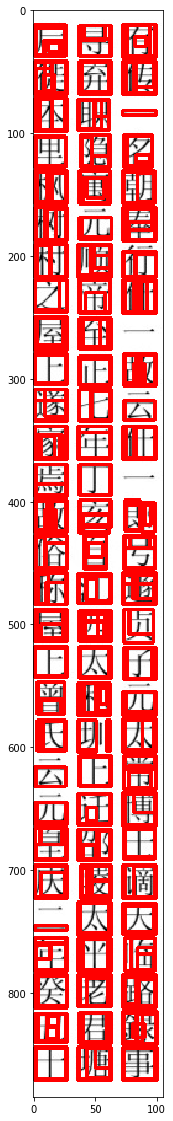

In [62]:
plt.figure(figsize=(25,20))
plt.imshow(img)

In [61]:
for box in bboxes:
    x, y, w, h = box
    cv2.rectangle(img, (x,y),(x+w, y+h), (255, 0, 0), 2)

In [86]:
arr = np.empty((4, 2, 3), dtype=np.float32)
print(arr)
# 打印字节串
b_arr = arr.tostring()
print(b_arr)
# 字节串转ndarray数据
arr_2 = np.frombuffer(b_arr, dtype=np.float32)
arr_2.shape = (4, 2, 3)
print(arr_2)

[[[1.946e-42 1.169e-42 1.945e-42]
  [1.183e-42 1.944e-42 1.187e-42]]

 [[1.941e-42 1.188e-42 1.937e-42]
  [1.190e-42 1.925e-42 1.190e-42]]

 [[1.924e-42 1.188e-42 1.923e-42]
  [1.171e-42 1.925e-42 1.167e-42]]

 [[1.927e-42 1.166e-42 1.939e-42]
  [1.166e-42 1.946e-42 1.167e-42]]]
b'm\x05\x00\x00B\x03\x00\x00l\x05\x00\x00L\x03\x00\x00k\x05\x00\x00O\x03\x00\x00i\x05\x00\x00P\x03\x00\x00f\x05\x00\x00Q\x03\x00\x00^\x05\x00\x00Q\x03\x00\x00]\x05\x00\x00P\x03\x00\x00\\\x05\x00\x00D\x03\x00\x00^\x05\x00\x00A\x03\x00\x00_\x05\x00\x00@\x03\x00\x00h\x05\x00\x00@\x03\x00\x00m\x05\x00\x00A\x03\x00\x00'
[[[1.946e-42 1.169e-42 1.945e-42]
  [1.183e-42 1.944e-42 1.187e-42]]

 [[1.941e-42 1.188e-42 1.937e-42]
  [1.190e-42 1.925e-42 1.190e-42]]

 [[1.924e-42 1.188e-42 1.923e-42]
  [1.171e-42 1.925e-42 1.167e-42]]

 [[1.927e-42 1.166e-42 1.939e-42]
  [1.166e-42 1.946e-42 1.167e-42]]]


In [87]:
type(b_arr)

bytes

In [98]:
from PIL import Image, ImageDraw,ImageFont

def put_texts(h, w, words, font):
    # 白底黑字
    img = np.ones((h, w, 3), np.uint8) * 255
    color = (255, 0, 0)
    #
    im = Image.fromarray(img)
    draw = ImageDraw.Draw(im)
    x, y = 2, 2
    for word in words:
        draw.text((x, y), word, color, font=font)
        word_w, word_h = font.getsize(word)
        if h > w:
            y += word_h
        else:
            w += word_w
    return np.array(im)

In [121]:
#font = ImageFont.truetype('/System/Library/Fonts/STHeiti Light.ttc')
im=put_texts(100,32,'上大声道',font)


In [115]:
img = np.ones((100, 32, 3), np.uint8) * 255
color = (255, 0, 0)
#
im = Image.fromarray(img)
draw = ImageDraw.Draw(im)

In [116]:
draw.text((2, 2), '空', color, font=font)

In [123]:
font.getsize('案例三等奖')

(100, 20)

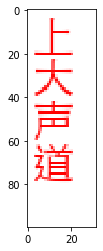

In [122]:
plt.imshow(im)

In [113]:
font.size

20

In [120]:
font=font.font_variant(size=20)